In [108]:

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from sklearn.datasets import load_breast_cancer 

from sklearn.neighbors import KNeighborsClassifier

with open('C:\\PMLExecises\\breast-cancer-wisconsin.data.txt', 'r', encoding='UTF-8') as f:
    df = pd.read_csv(f)

    
df = load_breast_cancer()

X,y = df.data,df.target

##print(df.data,df.target)    



In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=1234,
                                                            stratify=y_train)



print(" After stratefication.................")

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

 After stratefication.................
All: [ 37.25834798  62.74165202]
Training: [ 37.32394366  62.67605634]
Test: [ 37.19298246  62.80701754]


In [110]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct [Accuracy]:
0.933333333333


In [111]:
print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Samples correctly classified:
[  0   2   3   4   6   7   8   9  10  11  12  13  14  15  16  18  19  20
  21  23  24  25  26  27  28  29  31  32  33  34  35  36  37  38  40  41
  42  43  44  45  46  47  49  50  51  52  53  55  56  57  58  59  61  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 217 218 219 220 221 222 224 225 226 227 228 229 230 231
 232 233 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 

In [112]:
from sklearn.model_selection import cross_val_score

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(X_trainsub, y_trainsub).score(X_trainsub, y_trainsub)
    valid_score = knn.score(X_valid, y_valid)
    print('k: %d, Train/Valid Acc: %.3f/%.3f' %
          (k, train_score, valid_score))


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))


cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_valid, y_valid, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
    



k: 1, Train/Valid Acc: 1.000/0.887
k: 2, Train/Valid Acc: 0.986/0.883
k: 3, Train/Valid Acc: 0.962/0.906
k: 4, Train/Valid Acc: 0.967/0.915
k: 5, Train/Valid Acc: 0.962/0.901
k: 6, Train/Valid Acc: 0.962/0.915
k: 7, Train/Valid Acc: 0.953/0.897
k: 8, Train/Valid Acc: 0.958/0.915
k: 9, Train/Valid Acc: 0.944/0.892
k: 10, Train/Valid Acc: 0.948/0.892
k: 11, Train/Valid Acc: 0.934/0.878
k: 12, Train/Valid Acc: 0.934/0.878
k: 13, Train/Valid Acc: 0.934/0.873
k: 14, Train/Valid Acc: 0.939/0.873
k: 15, Train/Valid Acc: 0.934/0.883
k: 16, Train/Valid Acc: 0.934/0.883
k: 17, Train/Valid Acc: 0.925/0.883
k: 18, Train/Valid Acc: 0.925/0.883
k: 19, Train/Valid Acc: 0.925/0.878
k=9 Test Acc: 0.923


The optimal number of neighbors is 3


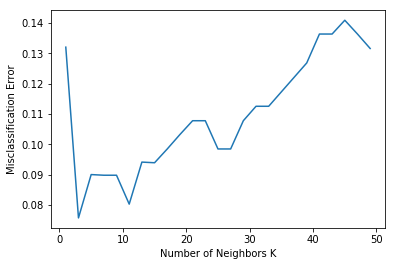

In [113]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()